In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.optim import Adam

import Models
import Data
import utils

[nltk_data] Downloading package punkt to
[nltk_data]     /home/data/ysunbc/anaconda3/envs/yusen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

## Build record object to record history

In [3]:
record = utils.Record_CLS()
epoch = 50

## train lstm classifier on full training dataset, and test on full test datazet

In [4]:
train = 'train_full'
test = 'test_full'
train_iter_full, test_iter_full, txt_field_full, label_field_full = Data.load_cls_dataset(train, test)

Number of vocab: 13190
Number of training samples: 50447
Number of testing samples: 4500
Example of training data:
 {'label': 'fear', 'source': 'tweets', 'sentence': ['sorry', 'friends', '-', 'i', "'m", 'swamped', 'with', 'deadlines', 'right', 'now', 'and', 'we', 'have', 'family', 'visiting', 'to', 'boot', '!', 'no', 'charades', 'for', 'me', '.']}

Example of testing data:
 {'label': 'fear', 'source': 'tweets', 'sentence': ['we', 'quite', 'like', 'worthing', 'its', 'a', 'relaxing', 'place', 'with', 'nice', 'coffee', 'shops', 'and', 'fresh', 'air..', 'and', 'not', 'too', 'many', 'oiks']}



In [5]:
train = pd.read_csv('./Dataset/emotion/train_full.csv')
weight = torch.FloatTensor(1/(np.array(list(train['label'].value_counts()))/min(list(train['label'].value_counts())))).to(device)
criterion = nn.CrossEntropyLoss(weight)
VOCAB_SIZE = len(txt_field_full.vocab)
PAD_IDX = txt_field_full.vocab.stoi['<pad>']

In [6]:
EMB_DIM = 150
HID_DIM = 150
DROPOUT = 0.2
NUM_LAYER = 1
N_CLASS= 9
lr = 0.0001

gru = Models.LSTM_CLS(VOCAB_SIZE, EMB_DIM, HID_DIM, DROPOUT, PAD_IDX, NUM_LAYER, N_CLASS).to(device)
gru_optimizer = Adam(gru.parameters(), lr=lr)
model_name = str(EMB_DIM) + '_' + str(HID_DIM) +'_' + str(NUM_LAYER) + '_'+ str(lr) + '_' + str('full')

utils.run_cls(train_iter_full, test_iter_full , gru, gru_optimizer, epoch, criterion, model_name, record, device)

/home/data/ysunbc/anaconda3/envs/yusen/lib/python3.6/site-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


0.109972121622827324


## train lstm classifier on train_0 training dataset, and test on support datazet

In [7]:
train = 'train_0'
test = 'support'
train_iter_sup, test_iter_sup, txt_field_sup, label_field_sup = Data.load_cls_dataset(train, test)

Number of vocab: 12324
Number of training samples: 45432
Number of testing samples: 2500
Example of training data:
 {'label': 'fear', 'source': 'tweets', 'sentence': ['sorry', 'friends', '-', 'i', "'m", 'swamped', 'with', 'deadlines', 'right', 'now', 'and', 'we', 'have', 'family', 'visiting', 'to', 'boot', '!', 'no', 'charades', 'for', 'me', '.']}

Example of testing data:
 {'label': 'fear', 'source': 'tweets', 'sentence': ['we', 'quite', 'like', 'worthing', 'its', 'a', 'relaxing', 'place', 'with', 'nice', 'coffee', 'shops', 'and', 'fresh', 'air..', 'and', 'not', 'too', 'many', 'oiks']}



In [8]:
train = pd.read_csv('./Dataset/emotion/train_0.csv')
weight = torch.FloatTensor(1/(np.array(list(train['label'].value_counts()))/min(list(train['label'].value_counts())))).to(device)
criterion = nn.CrossEntropyLoss(weight)
VOCAB_SIZE = len(txt_field_sup.vocab)
PAD_IDX = txt_field_sup.vocab.stoi['<pad>']

In [9]:
EMB_DIM = 150
HID_DIM = 150
DROPOUT = 0.2
NUM_LAYER = 1
N_CLASS = 5
lr = 0.0001

gru = Models.LSTM_CLS(VOCAB_SIZE, EMB_DIM, HID_DIM, DROPOUT, PAD_IDX, NUM_LAYER, N_CLASS).to(device)
gru_optimizer = Adam(gru.parameters(), lr=lr)
model_name = str(EMB_DIM) + '_' + str(HID_DIM) +'_' + str(NUM_LAYER) + '_'+ str(lr) + '_' + str('sup')

utils.run_cls(train_iter_sup, test_iter_sup , gru, gru_optimizer, epoch, criterion, model_name, record, device)

0.065845230078697265


## train lstm classifier on train_1 training dataset, and test on novel datazet

In [10]:
train = 'train_1'
test = 'noval'
train_iter_novel, test_iter_novel, txt_field_novel, label_field_novel = Data.load_cls_dataset(train, test)

Number of vocab: 2765
Number of training samples: 5015
Number of testing samples: 2000
Example of training data:
 {'label': 'shame', 'source': 'emotional_events', 'sentence': ['i', 'had', 'called', 'a', 'boy', 'who', 'had', 'dated', 'me', ',', 'and', 'told', 'him', 'that', 'i', 'was', 'ill', ',', 'while', ',', 'actually', ',', 'i', 'did', "n't", 'want', 'to', 'go', 'out', 'with', 'him', ',', 'later', 'on', ',', 'he', 'asked', 'me', 'if', 'i', 'was', 'feeling', 'better', ',', 'then', 'i', 'felt', 'ashamed', '.']}

Example of testing data:
 {'label': 'shame', 'source': 'emotional_events', 'sentence': ['after', 'having', 'quarelled', 'unnecessarily', 'and', 'without', 'any', 'reason', ',', 'and', 'having', 'been', 'stupidly', 'cross', 'in', 'every', 'way', '.']}



In [11]:
train = pd.read_csv('./Dataset/emotion/train_1.csv')
weight = torch.FloatTensor(1/(np.array(list(train['label'].value_counts()))/min(list(train['label'].value_counts())))).to(device)
criterion = nn.CrossEntropyLoss(weight)
VOCAB_SIZE = len(txt_field_novel.vocab)
PAD_IDX = txt_field_novel.vocab.stoi['<pad>']

In [12]:
EMB_DIM = 150
HID_DIM = 150
DROPOUT = 0.2
NUM_LAYER = 1
N_CLASS = 4
lr = 0.0001

gru = Models.LSTM_CLS(VOCAB_SIZE, EMB_DIM, HID_DIM, DROPOUT, PAD_IDX, NUM_LAYER, N_CLASS).to(device)
gru_optimizer = Adam(gru.parameters(), lr=lr)
model_name = str(EMB_DIM) + '_' + str(HID_DIM) +'_' + str(NUM_LAYER) + '_'+ str(lr) + '_' + str('novel')

utils.run_cls(train_iter_novel, test_iter_novel , gru, gru_optimizer, epoch, criterion, model_name, record, device)

0.0532907755970954955


## compare loss curve 

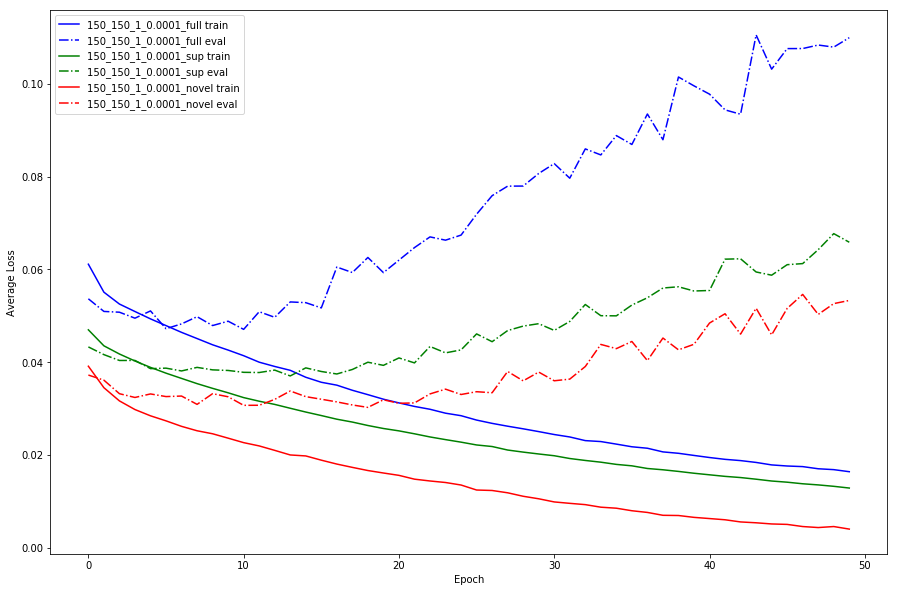

In [13]:
plot_set = list(record.TRAIN_LOSS.keys())
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lime', 'pink', 'skyblue', 'peru', 'orange', 'darkkahaki', 'plum' ]
plt.figure(figsize=(15,10))
for i in range(len(plot_set)):
    x = np.arange(len(record.TRAIN_LOSS[plot_set[i]]))
    plt.plot(x, record.TRAIN_LOSS[plot_set[i]], label=str(plot_set[i])+' train' , c=color[i])
    plt.plot(x, record.EVAL_LOSS[plot_set[i]], '-.', label=str(plot_set[i])+' eval', c=color[i])

plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend()
plt.show()

## compare accuracy curve

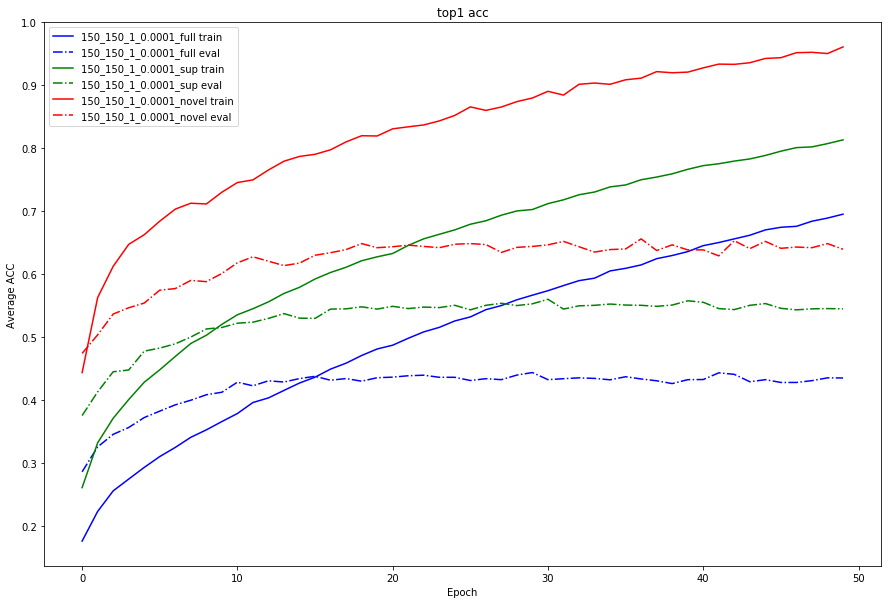

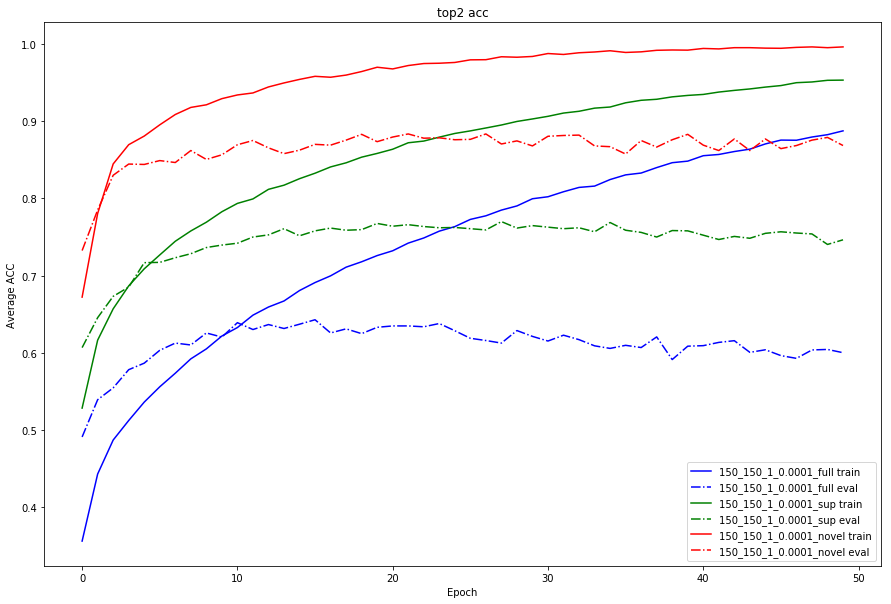

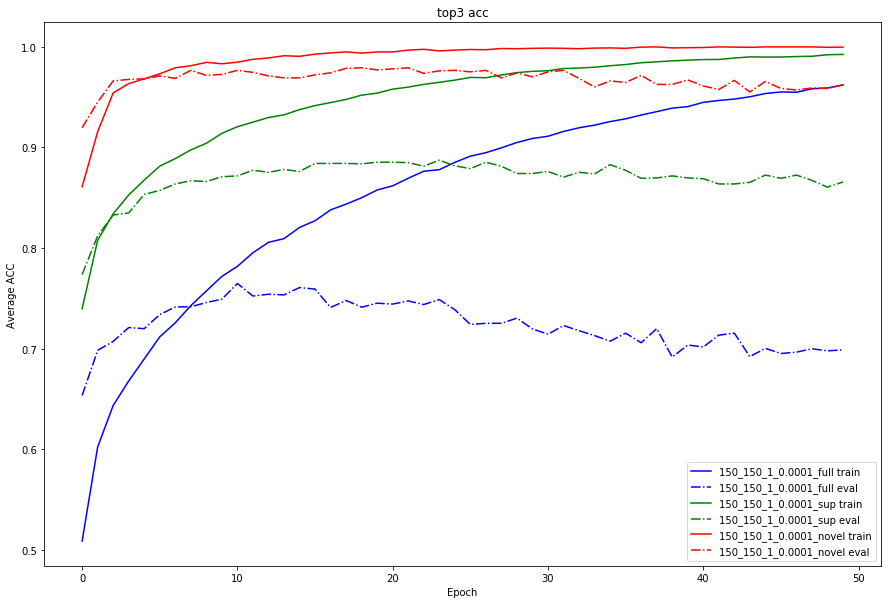

In [14]:

plot_set = list(record.TRAIN_ACC_1.keys())
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lime', 'pink', 'skyblue', 'peru', 'orange', 'darkkahaki', 'plum' ]
plt.figure(figsize=(15,10))
for i in range(len(plot_set)):
    x = np.arange(len(record.TRAIN_LOSS[plot_set[i]]))
    plt.plot(x, record.TRAIN_ACC_1[plot_set[i]], label=str(plot_set[i])+' train' , c=color[i])
    plt.plot(x, record.EVAL_ACC_1[plot_set[i]], '-.', label=str(plot_set[i])+' eval', c=color[i])
plt.title('top1 acc')
plt.xlabel('Epoch')
plt.ylabel('Average ACC')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
for i in range(len(plot_set)):

    plt.plot(x, record.TRAIN_ACC_2[plot_set[i]], label=str(plot_set[i])+' train' , c=color[i])
    plt.plot(x, record.EVAL_ACC_2[plot_set[i]], '-.', label=str(plot_set[i])+' eval', c=color[i])
plt.title('top2 acc')
plt.xlabel('Epoch')
plt.ylabel('Average ACC')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
for i in range(len(plot_set)):

    plt.plot(x, record.TRAIN_ACC_3[plot_set[i]], label=str(plot_set[i])+' train' , c=color[i])
    plt.plot(x, record.EVAL_ACC_3[plot_set[i]], '-.', label=str(plot_set[i])+' eval', c=color[i])
plt.title('top3 acc')
plt.xlabel('Epoch')
plt.ylabel('Average ACC')
plt.legend()
plt.show()

# select model and get f1 score and confustion matrix

## full test set

In [15]:
model_name = '150_150_1_0.0001_full'
step = 31

In [16]:
record.EVAL_ACC_1[model_name][step], record.EVAL_ACC_2[model_name][step], record.EVAL_ACC_3[model_name][step]

(0.43377777777777776, 0.6228888888888889, 0.7228888888888889)

0.4364555859526935

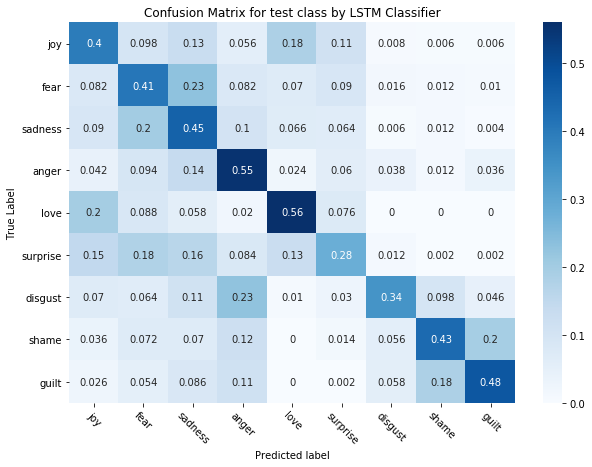

In [17]:
y_true = record.EVAL_True_Labels[model_name][step]
y_pred = [i[0] for i in record.EVAL_Predicted_Labels[model_name][step]]
cm = utils.plot_confusion_matrix(y_true, y_pred, 'Confusion Matrix for test class by LSTM Classifier', 'lstmclf_cm_test', list(label_field_full.vocab.stoi.keys()))
f1_score(y_true, y_pred, average='weighted')

## support set 

In [18]:
model_name = '150_150_1_0.0001_sup'
step = 33

In [19]:
record.EVAL_ACC_1[model_name][step], record.EVAL_ACC_2[model_name][step], record.EVAL_ACC_3[model_name][step]

(0.5504, 0.7568, 0.8736)

0.5540651886066394

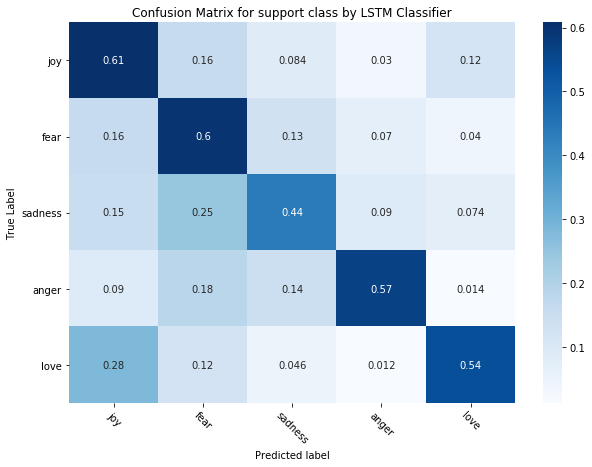

In [20]:
y_true = record.EVAL_True_Labels[model_name][step]
y_pred = [i[0] for i in record.EVAL_Predicted_Labels[model_name][step]]
m = utils.plot_confusion_matrix(y_true, y_pred, 'Confusion Matrix for support class by LSTM Classifier', 'lstmclf_cm_sup', list(label_field_sup.vocab.stoi.keys()))
f1_score(y_true, y_pred, average='weighted')

## novel set 

In [21]:
model_name = '150_150_1_0.0001_novel'
step = 32

In [22]:
record.EVAL_ACC_1[model_name][step], record.EVAL_ACC_2[model_name][step], record.EVAL_ACC_3[model_name][step]

(0.6435, 0.882, 0.9685)

0.6353245377185386

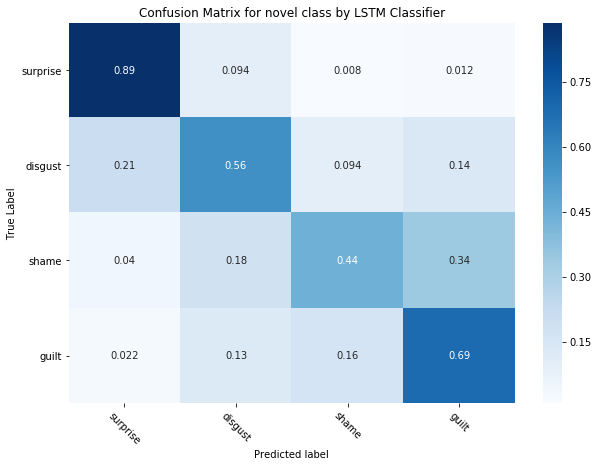

In [23]:
y_true = record.EVAL_True_Labels[model_name][step]
y_pred = [i[0] for i in record.EVAL_Predicted_Labels[model_name][step]]
m = utils.plot_confusion_matrix(y_true, y_pred, 'Confusion Matrix for novel class by LSTM Classifier', 'lstmclf_cm_novel', list(label_field_novel.vocab.stoi.keys()))
f1_score(y_true, y_pred, average='weighted')

In [24]:
import pickle
file = open('results/' + "lstm_cls.pkl", "wb")
pickle.dump(record, file)
file.close()